# Term Project: Final Submission
 
<br>
<h2><center>DSC 550 Winter 2023</center></h2>
<h2><center>Garth Scheck </center></h2>

<a id="0"></a> <br>
 # Table of Contents  
1. [Milestone 1](#50)
    1. [Introduction](#0)
    1. [Import datasets and append to a single dataframe](#1)     
        1. [First five rows of dataframe](#12) 
        1. [Last five rows of dataframe](#13) 
        1. [List of columns](#14) 
    1. [Outliers](#2) 
    1. [Spread of Data](#3) 
    1. [Correlation](#4)     
    1. [Regression Plots](#5)  
1. [Milestone 2](#51)
    1. [Missing Values](#60)
    1. [Filtering Data](#70)    
    1. [Outliers](#80)    
    1. [Skew](#90)
    1. [Categorical Variables](#95)
    1. [Column Order](#100)
1. [Milestone 3](#200)
    1. [House Price Prediction](#210)
        1. [Linear Regression](#220)
        1. [Random Forest Regression](#230)
        2. [Overview/Conclusion](#250)
1. [References](#6)      

### Milestone 1<a id="50"></a>

### Introduction<a id="0"></a>

> <p>Real estate is a competitive business and could benefit from machine learning.</p><p>For example, searching for affordable housing can be a timely process and is especially difficult and daunting for first time buyers because deciding what criteria is most important is not always straight forward. Being able to determine pricing based on a set of criteria, such as location, square footage, number of bedrooms, etc. would be very helpful. Could machine learning be used in this scenario to predict house prices if given a set of criteria?</p><p>I believe this would be a useful tool for real estate companies to have so that potential buyers could get an estimate on what the price would be given their criteria for a home. The model could also be useful for clients who are trying to sell their house, to get an idea of what price they can expect. </p><p>Data used for analysis and building the model will come from property sales datasets on the Milwaukee government website. Multiple datasets will be downloaded and combined into a single dataframe.  Link to dataset source is in the references.</p><p>To start, I will investigate if there are outliers using box plots. Next I will look at the spread of the data to see if it is skewed and then I will get an overview of correlation.</p><p>After the initial investigation, data in the dataframe will be cleaned to make analysis easier. Cleaning will involve getting rid of nulls in critical columns, removing unnecessary columns, and dealing with outliers. The cleaning step will also involve transformations such as converting categorical data to numerical to aid in determining correlation and scaling.</p><p>And finally, analysis will be done to help determine important attributes that affect house prices. These attributes will then be used to create the model.</p><p>The plan is to use linear regression to create the mode and house price will be the target for the model.</p>

### Import datasets and append to a single dataframe.<a id="1"></a>

<font color='blue'>Import necessary packages.</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read csv files into a dataframe
# source of dataset is in the references section

df = pd.read_csv("D:/Statistics/550/term/2022-property-sales-data.csv")

df['FinishedSqft'] = df['FinishedSqft'].astype('float32')

In [3]:
# Use for loop to append csv files to a single dataframe
for yr in range(18, 21):
    file = "D:/Statistics/550/term/20" + str(yr) +  "-property-sales-data.csv"
    df2 = pd.read_csv(file)
    if yr == 20:
        df2['FinishedSqft'] = df2['FinishedSqft'].str.replace(',', '')
        df2['Lotsize'] = df2['Lotsize'].str.replace(',', '')
        df2['Sale_price'] = df2['Sale_price'].str.replace(',', '')
        df2['Sale_price'] = df2['Sale_price'].str.replace('$', '')

    #df2['FinishedSqft'] = df2['FinishedSqft'].astype('float32')
    #df.append(df2, ignore_index=True)
    df = pd.concat([df, df2], ignore_index=True)
    df = df.reset_index(drop=True)

df['FinishedSqft'] = df['FinishedSqft'].astype('float32')
df['Lotsize'] = df['Lotsize'].astype('float32')
df['Sale_price'] = df['Sale_price'].astype('float32')

In [4]:
# Count total NaN at each column in a DataFrame 
print(" \nCount of missing values in each column: \n\n", 
      df.isnull().sum()) 

 
Count of missing values in each column: 

 PropType            8
taxkey              0
Address             0
District            1
nbhd               25
Style              39
Extwall          3911
Stories            88
Year_Built         27
Rooms            6465
FinishedSqft       44
Units               0
Bdrms             950
Fbath             655
Hbath            4840
Lotsize             0
Sale_date           0
Sale_price         10
CondoProject    24193
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25225 entries, 0 to 25224
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PropType      25217 non-null  object 
 1   taxkey        25225 non-null  int64  
 2   Address       25225 non-null  object 
 3   District      25224 non-null  float64
 4   nbhd          25200 non-null  float64
 5   Style         25186 non-null  object 
 6   Extwall       21314 non-null  object 
 7   Stories       25137 non-null  float64
 8   Year_Built    25198 non-null  float64
 9   Rooms         18760 non-null  float64
 10  FinishedSqft  25181 non-null  float32
 11  Units         25225 non-null  int64  
 12  Bdrms         24275 non-null  float64
 13  Fbath         24570 non-null  float64
 14  Hbath         20385 non-null  float64
 15  Lotsize       25225 non-null  float32
 16  Sale_date     25225 non-null  object 
 17  Sale_price    25215 non-null  float32
 18  CondoProject  1032 non-nul

#### <font color='blue'>First five rows of dataframe.</font><a id="12"></a> 

In [6]:
print(df.head())

        PropType    taxkey                Address  District    nbhd  \
0  Manufacturing  30131000   9434-9446 N 107TH ST       9.0  6300.0   
1     Commercial  30152000   9306-9316 N 107TH ST       9.0  6202.0   
2    Residential  49980110         9327 N SWAN RD       9.0    40.0   
3    Residential  49993200  9411 W COUNTY LINE RD       9.0    40.0   
4    Residential  50042000        9322 N JOYCE AV       9.0    40.0   

                       Style         Extwall  Stories  Year_Built  Rooms  \
0           Service Building  Concrete Block      1.0      1978.0    NaN   
1  Office Building - 1 Story           Brick      1.0      1982.0    NaN   
2                        NaN             NaN      NaN         NaN    NaN   
3                      Ranch  Aluminum/Vinyl      1.0      1959.0    6.0   
4                      Ranch  Aluminum/Vinyl      1.0      1980.0   10.0   

   FinishedSqft  Units  Bdrms  Fbath  Hbath    Lotsize  Sale_date  Sale_price  \
0       20600.0      6    NaN    0.

#### <font color='blue'>Last five rows of dataframe.</font><a id="13"></a>

In [7]:
print(df.tail())

          PropType      taxkey          Address  District    nbhd  \
25220  Condominium  7160336000  1910 W SALEM ST      13.0  5360.0   
25221  Condominium  7160347000   6330 S 20TH ST      13.0  5360.0   
25222  Condominium  7160366000   6378 S 20TH ST      13.0  5360.0   
25223  Condominium  7160367000   6366 S 20TH ST      13.0  5360.0   
25224  Condominium  7160369000   6380 S 20TH ST      13.0  5360.0   

                      Style Extwall  Stories  Year_Built  Rooms  FinishedSqft  \
25220  Low Rise 1-3 Stories     NaN      2.0      1974.0    4.0        1100.0   
25221  Low Rise 1-3 Stories     NaN      1.0      1974.0    5.0        1141.0   
25222  Low Rise 1-3 Stories     NaN      2.0      1974.0    5.0        1100.0   
25223  Low Rise 1-3 Stories     NaN      2.0      1974.0    5.0        1100.0   
25224  Low Rise 1-3 Stories     NaN      2.0      1974.0    5.0        1100.0   

       Units  Bdrms  Fbath  Hbath  Lotsize   Sale_date  Sale_price  \
25220      1    2.0    1.0  

#### <font color='blue'>Columns in dataframe.</font><a id="14"></a> 

In [8]:
# print the columns by looping through them
for col in df.columns:
    print(col)

PropType
taxkey
Address
District
nbhd
Style
Extwall
Stories
Year_Built
Rooms
FinishedSqft
Units
Bdrms
Fbath
Hbath
Lotsize
Sale_date
Sale_price
CondoProject


### Checking for Outliers<a id="2"></a> 

> <b><font color='blue'>Show box plots of Finished Sqft and Sale Price to check for outliers.</font></b>

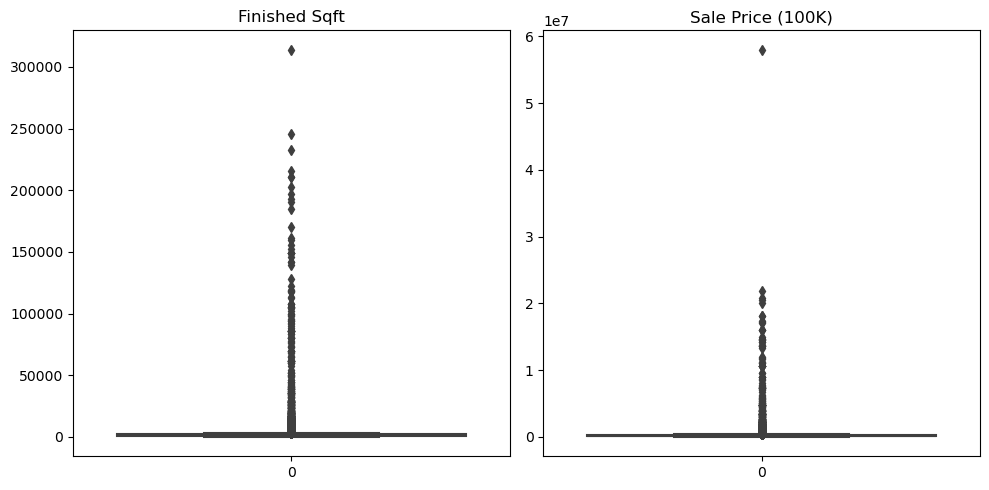

In [9]:
# create two subplots
fig, axs = plt.subplots(1,2, figsize = (10,5))

# create a box plot of Finished Square feet and put on axis 0

plt1 = sns.boxplot(df['FinishedSqft'], ax = axs[0])
plt1.title.set_text('Finished Sqft')

# create a box plot of Sales Price feet and put on axis 1
plt2 = sns.boxplot(df['Sale_price'], ax = axs[1])
plt2.title.set_text('Sale Price (100K)')
plt.tight_layout()

#### <font color='blue'>As can be seen by just the two box plots above, there are quite a few outliers.</font>

### Spread of Data <a id="3"></a>

> <p><b><font color='blue'>Display distribution plots to show spread of sale price and finished square feet data.</font></b></p>

C:\Users\Garth\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Garth\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Garth\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


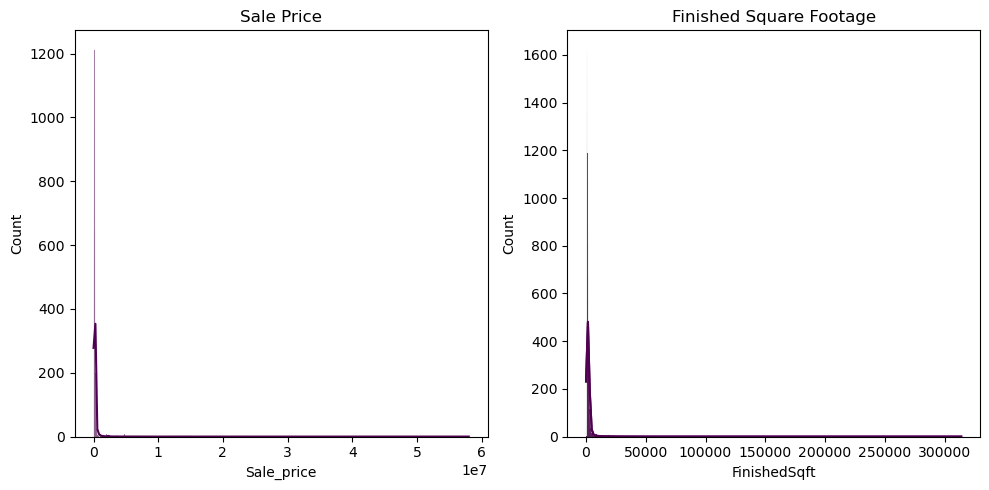

In [10]:
# create two subplots
fig, axs = plt.subplots(1,2, figsize = (10,5))

# create a histogram plot of Sales Price and put on axis 0
plt1 = sns.histplot(df["Sale_price"],color='#500050', ax = axs[0], kde=True)
plt1.title.set_text('Sale Price')

# create a histogram plot of Finished Square feet and put on axis 1
plt2 = sns.histplot(df["FinishedSqft"],color='#500050', ax = axs[1], kde=True)
plt2.title.set_text('Finished Square Footage')
plt.tight_layout()

# create a histogram plot of Finished Square feet and put on axis 1
plt2 = sns.histplot(df["FinishedSqft"],color='#500050', ax = axs[1], kde=True)
plt2.title.set_text('Finished Square Footage')
plt.tight_layout()

### Correlation <a id="4"></a> 

> <p><b><font color='blue'>Heat map to visualize correlation.</font></b></p>

In [11]:
df['PropType'] = df['PropType'].factorize()[0]
df['Style'] = df['Style'].factorize()[0]
df['Extwall'] = df['Extwall'].factorize()[0]

df.drop('Address', axis=1, inplace=True)
df.drop('Sale_date', axis=1, inplace=True)
df.drop('CondoProject', axis=1, inplace=True)

df = df[df['Lotsize'] > 1]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21696 entries, 1 to 25217
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PropType      21696 non-null  int64  
 1   taxkey        21696 non-null  int64  
 2   District      21695 non-null  float64
 3   nbhd          21671 non-null  float64
 4   Style         21696 non-null  int64  
 5   Extwall       21696 non-null  int64  
 6   Stories       21674 non-null  float64
 7   Year_Built    21681 non-null  float64
 8   Rooms         16215 non-null  float64
 9   FinishedSqft  21655 non-null  float32
 10  Units         21696 non-null  int64  
 11  Bdrms         20861 non-null  float64
 12  Fbath         21098 non-null  float64
 13  Hbath         17499 non-null  float64
 14  Lotsize       21696 non-null  float32
 15  Sale_price    21688 non-null  float32
dtypes: float32(3), float64(8), int64(5)
memory usage: 2.6 MB


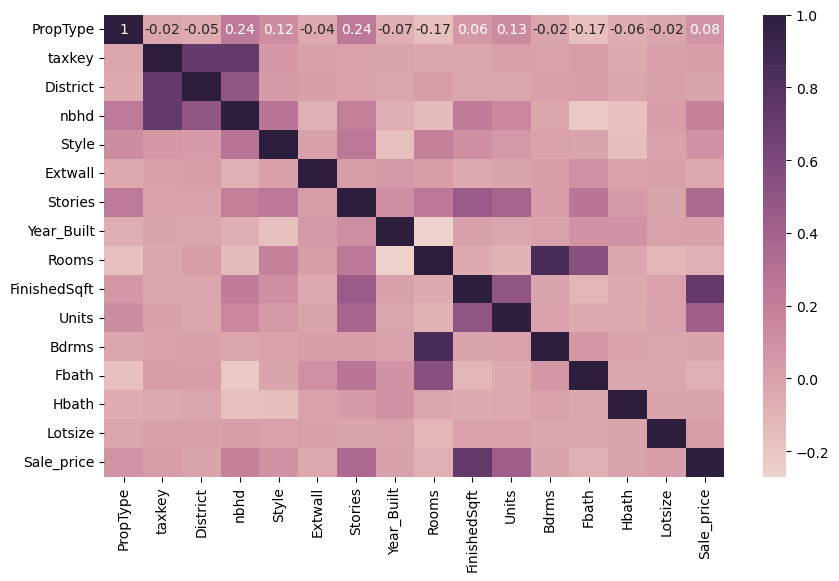

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# get correlation matrix
matrix = df.corr().round(2)

# create a heat map of matrix
plt.figure(figsize = (10, 6))
sns.heatmap(matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

> <p><b><font color='blue'>The attribues appearing to have the most correlation with price are units, lot size, and finished square footage.</font></b></p>

### Regression Plots<a id="5"></a> 

#### <font color='blue'>Use regression plots to look further at units, lot size and finished square footage.</font>

<font color='blue'>Lot Size and Sale Price</font>

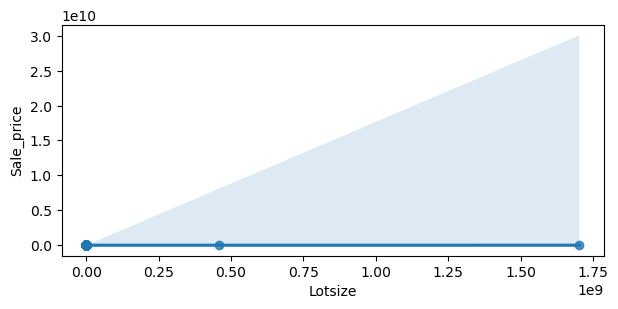

In [14]:
plt.figure(figsize=(7, 3))
sns.regplot(x='Lotsize', y='Sale_price', data=df)
plt.show()

<font color='blue'>Units and Sale Price</font>

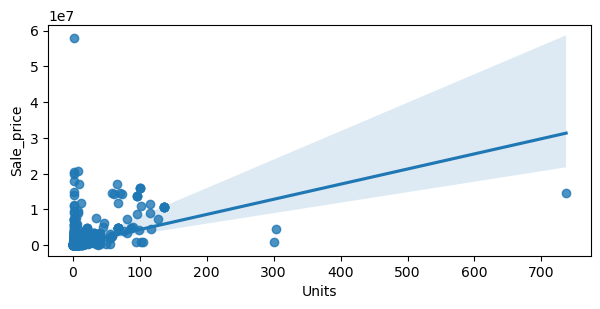

In [15]:
plt.figure(figsize=(7, 3))
sns.regplot(x='Units', y='Sale_price', data=df)
plt.show()

<font color='blue'>Finished Square Footage and Sale Price</font>

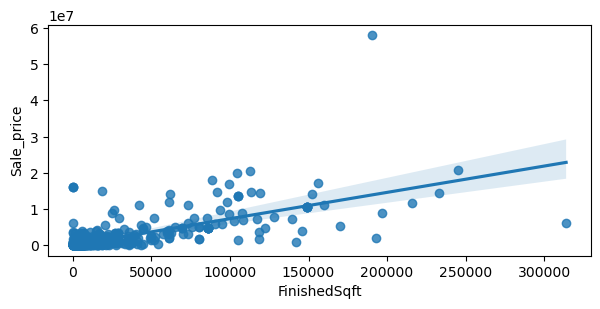

In [16]:
plt.figure(figsize=(7, 3))
sns.regplot(x='FinishedSqft', y='Sale_price', data=df)
plt.show()

### Milestone 2<a id="51"></a>

### Check for Missing Values<a id="60"></a> 

In [17]:
# Count total NaN at each column in a DataFrame 
print(" \nCount of missing values in each column: \n\n", 
      df.isnull().sum()) 

 
Count of missing values in each column: 

 PropType           0
taxkey             0
District           1
nbhd              25
Style              0
Extwall            0
Stories           22
Year_Built        15
Rooms           5481
FinishedSqft      41
Units              0
Bdrms            835
Fbath            598
Hbath           4197
Lotsize            0
Sale_price         8
dtype: int64


<font color='blue'>There are ten columns containing missing values. Next steps will be determining how to deal with the missing values.</font></b></p>

In [18]:
df = df[df['FinishedSqft'].notna()]
df = df[df['Year_Built'].notna()]
df = df[df['Stories'].notna()]
df.shape

(21641, 16)

#### <font color='blue'>Remove exterior wall column, as it does not add any value.</font>

In [19]:
df.drop('Extwall', axis=1, inplace=True)

#### <font color='blue'>Remove rooms column as it is the same as number of bed rooms.</font>

In [20]:
df.drop('Rooms', axis=1, inplace=True)

#### <font color='blue'>Remove rows where sale price, neighborhood, and district are null. Rows are being removed because entering a value could produce misleading information.</font>

In [21]:
df = df[df['Sale_price'].notna()]
df = df[df['nbhd'].notna()]
df = df[df['District'].notna()]

#### <font color='blue'>Enter a zero for half bath and full bath where entries are NaN. Enter a one for bedrooms where entry is NaN.</font>

In [22]:
df['Hbath'] = df['Hbath'].fillna(0)
df['Fbath'] = df['Fbath'].fillna(0)
df['Bdrms'] = df['Bdrms'].fillna(1)

### Return only Residential Properties.<a id="70"></a> 

#### <font color='blue'>It appears that the majority of properties, with the number of bedrooms having null, are not residential. To test this we will return only residential properties.</font>

In [23]:
# return rows only containing property types that are Residential 
df_residential = df[df['PropType'] == 2]

# reset index
df_residential = df_residential.reset_index(drop=True)

# show number of missing values
print(" \nNumber of records missing number of bedrooms: \n\n", 
      df_residential['Bdrms'].isnull().sum()) 

 
Number of records missing number of bedrooms: 

 0


In [24]:
df_residential.head(100)

,PropType,taxkey,District,nbhd,Style,Stories,Year_Built,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_price
0,2,49993200,9.0,40.0,2,1.0,1959.0,1334.0,1,3.0,1.0,1.0,83200.0,280000.0
1,2,50042000,9.0,40.0,2,1.0,1980.0,1006.0,1,6.0,1.0,0.0,8303.0,233100.0
2,2,50074000,9.0,40.0,2,1.0,1982.0,1007.0,1,3.0,1.0,0.0,7200.0,215000.0
3,2,50085000,9.0,40.0,2,1.0,1984.0,1301.0,1,3.0,2.0,0.0,7200.0,150000.0
4,2,50089000,9.0,40.0,3,2.0,2007.0,2237.0,1,4.0,2.0,1.0,15677.0,400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,840286000,9.0,360.0,2,1.0,1958.0,1351.0,1,6.0,1.0,0.0,11712.0,170000.0
96,2,840345000,9.0,360.0,2,1.0,1960.0,1353.0,1,6.0,1.0,1.0,10304.0,260000.0
97,2,840358000,9.0,360.0,2,1.0,1956.0,1161.0,1,6.0,3.0,0.0,10125.0,222000.0
98,2,840359000,9.0,360.0,2,1.0,1958.0,1520.0,1,3.0,1.0,1.0,10125.0,315000.0


#### Correlation of Filtered Dataset

> <p><b><font color='blue'>Heat map to visualize correlation.</font></b></p>

C:\Users\Garth\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


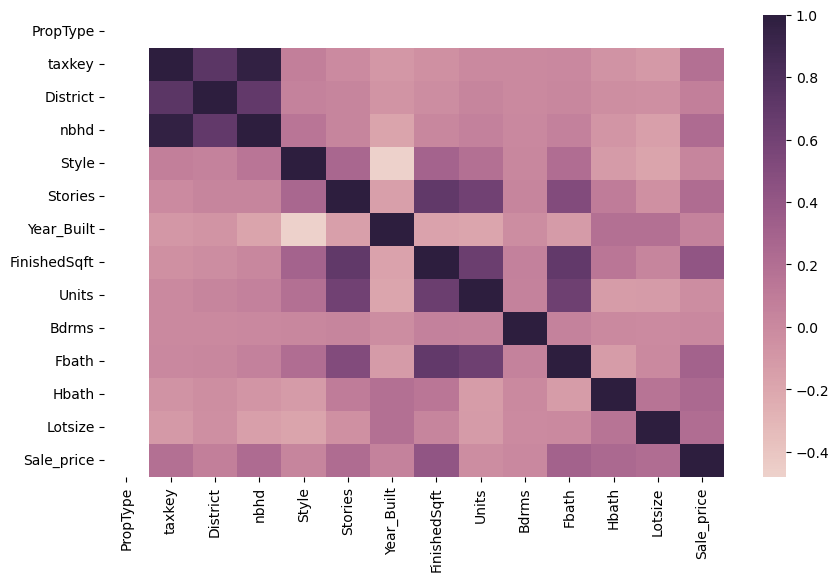

In [25]:
# get correlation matrix
matrix = df_residential.corr().round(2)

# create a heat map of matrix
plt.figure(figsize = (10, 6))
dataplot = sns.heatmap(matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

### Removing Outliers.<a id="80"></a> 

#### <font color='blue'>Create a new dataframe with outliers removed.</font>

C:\Users\Garth\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Garth\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


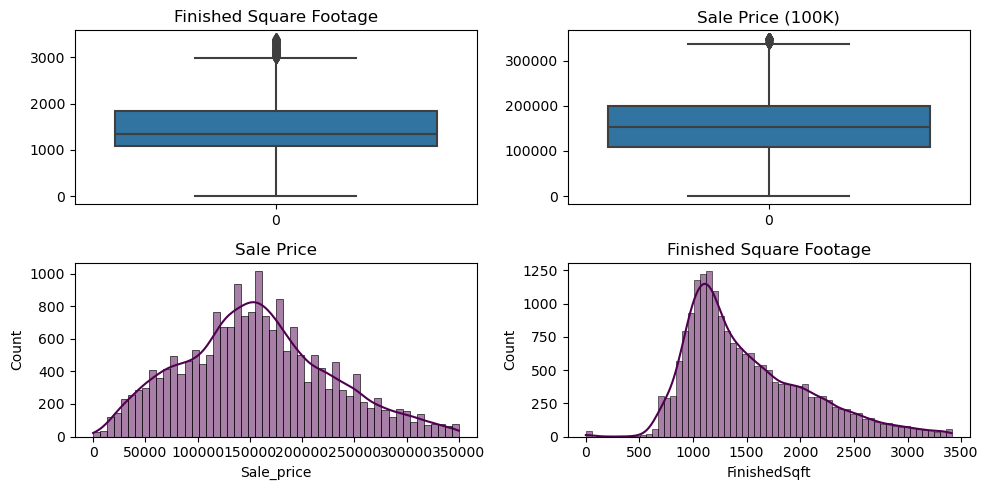

In [26]:
# calculate the 25th and 75th percentile
Q1 = df.FinishedSqft.quantile(0.25)
Q3 = df.FinishedSqft.quantile(0.75)

# filter data using percentiles
IQR = Q3 - Q1
df_wo = df[(df.FinishedSqft >= Q1 - 1.5*IQR) & (df.FinishedSqft <= Q3 + 1.5*IQR)]

Q1 = df_wo.Sale_price.quantile(0.25)
Q3 = df_wo.Sale_price.quantile(0.75)
IQR = Q3 - Q1
df_wo = df_wo[(df_wo.Sale_price >= Q1 - 1.5*IQR) & (df_wo.Sale_price <= Q3 + 1.5*IQR)].reset_index()

# create three subplots
fig, axs = plt.subplots(2,2, figsize = (10,5))

# create a boxplot of Finished Square Feet and put on axis 0
plt1 = sns.boxplot(df_wo['FinishedSqft'], ax = axs[0,0])
plt1.title.set_text('Finished Square Footage')

plt2 = sns.boxplot(df_wo['Sale_price'], ax = axs[0,1])
plt2.title.set_text('Sale Price (100K)')

# create a histogram plot of Sales Price and put on axis 1
plt3 = sns.histplot(df_wo["Sale_price"],color='#500050', ax = axs[1,0], kde=True)
plt3.title.set_text('Sale Price')

# create a histogram plot of Finished Square feet and put on axis 2
plt4 = sns.histplot(df_wo["FinishedSqft"],color='#500050', ax = axs[1,1], kde=True)
plt4.title.set_text('Finished Square Footage')
plt.tight_layout()


#### <font color='blue'>Do the same for the residential dataset.</font>

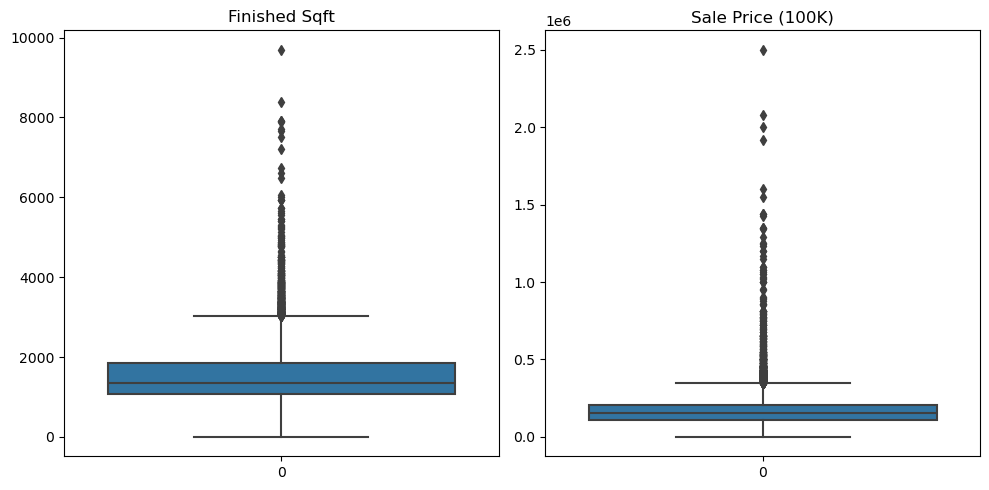

In [27]:
# create two subplots
fig, axs = plt.subplots(1,2, figsize = (10,5))

# create a box plot of Finished Square feet and put on axis 0

plt1 = sns.boxplot(df_residential['FinishedSqft'], ax = axs[0])
plt1.title.set_text('Finished Sqft')

# create a box plot of Sales Price feet and put on axis 1
plt2 = sns.boxplot(df_residential['Sale_price'], ax = axs[1])
plt2.title.set_text('Sale Price (100K)')
plt.tight_layout()

C:\Users\Garth\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Garth\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


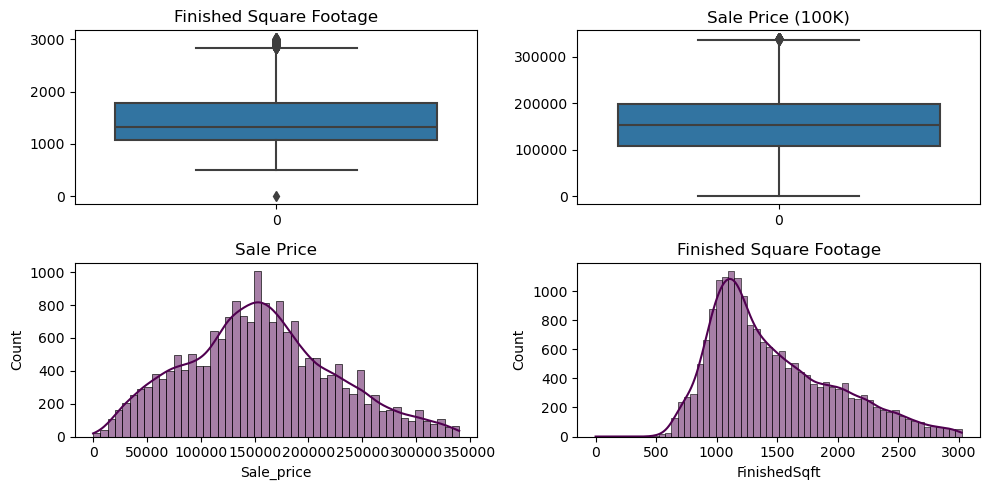

In [28]:
# calculate the 25th and 75th percentile
Q1 = df_residential.FinishedSqft.quantile(0.25)
Q3 = df_residential.FinishedSqft.quantile(0.75)

# filter data using percentiles
IQR = Q3 - Q1
df_res_wo = df_residential[(df_residential.FinishedSqft >= Q1 - 1.5*IQR) & (df_residential.FinishedSqft <= Q3 + 1.5*IQR)]

Q1 = df_res_wo.Sale_price.quantile(0.25)
Q3 = df_res_wo.Sale_price.quantile(0.75)
IQR = Q3 - Q1
df_res_wo = df_res_wo[(df_res_wo.Sale_price >= Q1 - 1.5*IQR) & (df_res_wo.Sale_price <= Q3 + 1.5*IQR)].reset_index()

# create three subplots
fig, axs = plt.subplots(2,2, figsize = (10,5))

# create a boxplot of Finished Square Feet and put on axis 0
plt1 = sns.boxplot(df_res_wo['FinishedSqft'], ax = axs[0,0])
plt1.title.set_text('Finished Square Footage')

plt2 = sns.boxplot(df_res_wo['Sale_price'], ax = axs[0,1])
plt2.title.set_text('Sale Price (100K)')

# create a histogram plot of Sales Price and put on axis 1
plt3 = sns.histplot(df_res_wo["Sale_price"],color='#500050', ax = axs[1,0], kde=True)
plt3.title.set_text('Sale Price')

# create a histogram plot of Finished Square feet and put on axis 2
plt4 = sns.histplot(df_res_wo["FinishedSqft"],color='#500050', ax = axs[1,1], kde=True)
plt4.title.set_text('Finished Square Footage')
plt.tight_layout()

> <p><b><font color='blue'>Finished square feet is positively skewed.</font></b></p>
> <p><b><font color='blue'>The majority of homes being sold seem to be in a narrow range of square footage and price.</font></b></p>

### Apply Log Transformation to Finished Square Footage to Reduce Skewness.<a id="90"></a> 

C:\Users\Garth\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Garth\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


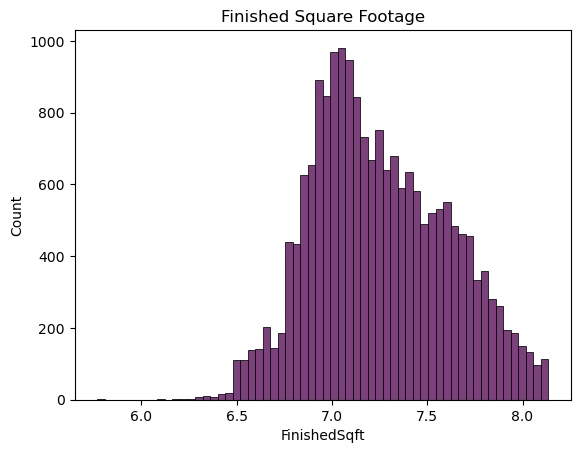

In [29]:
df_wo_lg = df_wo.copy()
df_wo_lg['FinishedSqft'] = np.log(df_wo['FinishedSqft'])

# create a histogram plot of Finished Square feet and put on axis 2
hist_plt = sns.histplot(df_wo_lg["FinishedSqft"],color='#500050')
hist_plt.title.set_text('Finished Square Footage')

C:\Users\Garth\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Garth\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


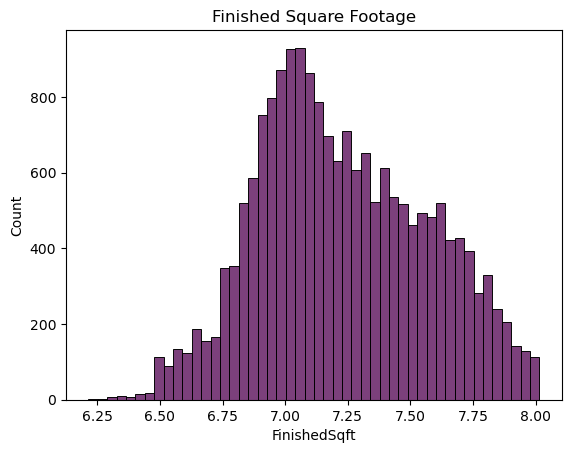

In [30]:
df_res_wo_lg = df_res_wo.copy()
df_res_wo_lg['FinishedSqft'] = np.log(df_res_wo['FinishedSqft'])

# create a histogram plot of Finished Square feet and put on axis 2
hist_plt = sns.histplot(df_res_wo_lg["FinishedSqft"],color='#500050')
hist_plt.title.set_text('Finished Square Footage')

### Categorical Variables<a id="95"></a>

<font color='blue'>There are four categorical variables:<br>
    &emsp;&emsp;taxkey<br>
    &emsp;&emsp;District<br>
    &emsp;&emsp;nbhd<br>
    &emsp;&emsp;Style<br></font>

In [31]:
df = pd.get_dummies(
    dtype=int,
    data=df,
    columns=["taxkey", "District", "nbhd", "Style"],
    prefix=["t", "d","n","s"])

In [32]:
df.head()

,PropType,Stories,Year_Built,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_price,...,s_193,s_194,s_195,s_196,s_197,s_198,s_200,s_201,s_202,s_203
1,1,1.0,1982.0,9688.0,23,1.0,0.0,0.0,35719.0,385000.0,...,0,0,0,0,0,0,0,0,0,0
3,2,1.0,1959.0,1334.0,1,3.0,1.0,1.0,83200.0,280000.0,...,0,0,0,0,0,0,0,0,0,0
4,2,1.0,1980.0,1006.0,1,6.0,1.0,0.0,8303.0,233100.0,...,0,0,0,0,0,0,0,0,0,0
5,2,1.0,1982.0,1007.0,1,3.0,1.0,0.0,7200.0,215000.0,...,0,0,0,0,0,0,0,0,0,0
6,2,1.0,1984.0,1301.0,1,3.0,2.0,0.0,7200.0,150000.0,...,0,0,0,0,0,0,0,0,0,0


### Reordering Columns.<a id="100"></a>

<font color='blue'>Move the sale price column to the front to also make analysis easier.</font>

In [33]:
# remove Sale_price column and store in variable 
first_column = df_residential.pop('Sale_price') 
  
# insert Sale_price into first position
df_residential.insert(0, 'Sale_price', first_column) 

### Milestone 3<a id="200"></a>

### House Price Prediction<a id="210"></a>

<font color='blue'>Linear regression models were chosen since the target value, sale price, is numeric.</font>

#### Linear Regression<a id="220"></a>

#### <font color='blue'> 1. The First Linear Regression model uses the original dataset.</font>

<font color='blue'> &emsp;Dataset is split into test and training sets.</font>

In [34]:
from sklearn.model_selection import train_test_split
x = df.drop(['Sale_price'],axis=1).values
y = df['Sale_price'].values
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=0)

<font color='blue'>&emsp;Create a linear regression model from train data.</font>

In [35]:
from pandas import Series, DataFrame

# importing linear regressionfrom sklearn
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

#training the model
lreg.fit(x_train, y_train)
#predicting on cv
pred = lreg.predict(x_test)
#calculating mse
mse = np.mean((pred - y_test)**2)

<font color='blue'>&emsp;Get the MSE and Accuracy Values<font>

In [36]:
print(f'MSE: {mse}')
accuracy = lreg.score(x_test, y_test)
print(f'Accuracy: {accuracy}')

MSE: 101062221517569.34
Accuracy: -74.60785239229823


#### <font color='blue'>2. The second Linear Regression model uses data without outliers.</font>

<font color='blue'>&emsp;Split data into test and train datasets.</font>

In [37]:
from sklearn.model_selection import train_test_split
x = df_wo.drop(['Sale_price'],axis=1).values
y = df_wo['Sale_price'].values
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=0)

<font color='blue'>&emsp;Create a linear regression model from train data.</font>

In [38]:
from pandas import Series, DataFrame

# importing linear regressionfrom sklearn
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

<font color='blue'>&emsp;Get the MSE and Accuracy Values<font>

In [39]:
#training the model
lreg.fit(x_train, y_train)
#predicting on cv
pred = lreg.predict(x_test)
#calculating mse
mse = np.mean((pred - y_test)**2)

In [40]:
print(f'MSE: {mse}')
accuracy = lreg.score(x_test, y_test)
print(f'Accuracy: {accuracy}')

MSE: 3919191585.746163
Accuracy: 0.23341230185472972


#### <font color='blue'>3. The third Linear Regression model uses residential sales data only.</font>

<font color='blue'>&emsp;Split data into test and train datasets.</font>

In [41]:
from sklearn.model_selection import train_test_split
x = df_residential.drop(['Sale_price'],axis=1).values
y = df_residential['Sale_price'].values
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#### <font color='blue'>&emsp;Create a linear regression model from train data.</font>

In [42]:
from pandas import Series, DataFrame

# importing linear regressionfrom sklearn
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

#training the model
lreg.fit(x_train, y_train)
#predicting on cv
pred = lreg.predict(x_test)
#calculating mse
mse = np.mean((pred - y_test)**2)

<font color='blue'>&emsp;Get the MSE and Accuracy Values<font>

In [43]:
print(f'MSE: {mse}')
accuracy = lreg.score(x_test, y_test)
print(f'Accuracy: {accuracy}')

MSE: 5291894406.617177
Accuracy: 0.44341999210247607


#### <font color='blue'>4. The fourth Linear Regression model uses residential sales data without outliers.</font>

<font color='blue'>&emsp;Split into test and train datasets.</font>

In [44]:
from sklearn.model_selection import train_test_split
x = df_res_wo.drop(['Sale_price'],axis=1).values
y = df_res_wo['Sale_price'].values
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=0)

<font color='blue'>&emsp;Create a linear regression model from train data.</font>

In [45]:
from pandas import Series, DataFrame

# importing linear regressionfrom sklearn
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

#training the model
lreg.fit(x_train, y_train)
#predicting on cv
pred = lreg.predict(x_test)
#calculating mse
mse = np.mean((pred - y_test)**2)

<font color='blue'>&emsp;Get the MSE and Accuracy Values<font>

In [46]:
print(f'MSE: {mse}')
accuracy = lreg.score(x_test, y_test)
print(f'Accuracy: {accuracy}')

MSE: 3171513471.531673
Accuracy: 0.33927905105909406


#### Random Forest Regression<a id="230"></a>

#### <font color='blue'>5. The first Random Forest Regression model uses the original dataset.</font>

<font color='blue'>&emsp;Create a Random Forest Regression model</font>

In [47]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

In [48]:
x = df.drop(['Sale_price'],axis=1).values
y = df['Sale_price'].values
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=0)
# Fit the regressor with x and y data
regressor.fit(x_train, y_train)

C:\Users\Garth\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

<font color='blue'>&emsp;Get the MSE, Out-Of-Bag, and R Squared Values<font>

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
predictions = regressor.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print(mse)

674079670330.7104


In [50]:
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

Out-of-Bag Score: 0.6568982615687212


In [51]:
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

R-squared: 0.49569962494686326


#### <font color='blue'>6. The second Random Forest Regression model uses the dataset without outliers.</font>

In [52]:
x = df_wo.drop(['Sale_price'],axis=1).values
y = df_wo['Sale_price'].values
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [53]:
# Fit the regressor with x and y data
regressor.fit(x_train, y_train)

C:\Users\Garth\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

<font color='blue'>&emsp;Get the MSE, Out-Of-Bag, and R Squared Values<font>

In [54]:
from sklearn.metrics import mean_squared_error, r2_score
predictions = regressor.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print(mse)

1311813575.4398525


In [55]:
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

Out-of-Bag Score: 0.6320124932399352


In [56]:
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

R-squared: 0.743411331854884


#### <font color='blue'>7. The third Random Forest Regression model uses the residential dataset.</font>

In [57]:
x = df_residential.drop(['Sale_price'],axis=1).values
y = df_residential['Sale_price'].values
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=0)
# Fit the regressor with x and y data
regressor.fit(x_train, y_train)

C:\Users\Garth\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

<font color='blue'>&emsp;Get the MSE, Out-Of-Bag, and R Squared Values<font>

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
predictions = regressor.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print(mse)

3210758616.604026


In [59]:
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

Out-of-Bag Score: 0.5943239254958124


In [60]:
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

R-squared: 0.6623054205405294


#### <font color='blue'>8. The fourth Random Forest Regression model uses the residential dataset without outliers.</font>

In [61]:
x = df_res_wo.drop(['Sale_price'],axis=1).values
y = df_res_wo['Sale_price'].values
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=0)
# Fit the regressor with x and y data
regressor.fit(x_train, y_train)

C:\Users\Garth\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

<font color='blue'>&emsp;Get the MSE, Out-Of-Bag, and R Squared Values<font>

In [62]:
from sklearn.metrics import mean_squared_error, r2_score
predictions = regressor.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print(mse)

1229271125.091397


In [63]:
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

Out-of-Bag Score: 0.6373090183708544


In [64]:
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

R-squared: 0.7439061219299217


#### Overview/Conclusion<a id="250"></a>

<font color='blue'>An additional step was added to Milestone 2 to create dummy variables for categorical data.</font><br>

<font color='blue'>Since the target, sales price, is numeric, regression models were chosen.</font><br>

<font color='blue'>Each model was trained on several different forms of the dataset to see how the results differentiated for each.</font><br>

<font color='blue'>The Random Forest Regression model appeared to be the best choice as it had an R sqared value of 49% with the original, un-modified, dataset and 66% using the residential dataset, containing outliers.</font><br>

<font color='blue'>The Linear Regression Model did not seem to deal well with outliers very well.</font><br>
<font color='blue'>When outliers were removed it reported 23% accuracy and performed almost twice as good, 44% accuracy, using residential data.</font>

<font color='blue'> Overall, both models performed better using the residential datasets. 


### References:<a id="6"></a> 

#### Data Source:
https://data.milwaukee.gov/dataset/property-sales-data